In [1]:
import sys
sys.path.insert(0, '..')
import time
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib notebook  
import numpy as np

from Configuration import Configuration
from MuscleSpindle import MuscleSpindle

In [2]:
conf = Configuration('confMuscleSpindle.rmto')

In [3]:
t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)
IaFR = np.zeros([len(t), 1])
fBag1 = np.zeros([len(t), 1])
fBag2 = np.zeros([len(t), 1])
fChain = np.zeros([len(t), 1])
TBag1 = np.zeros([len(t), 1])
TBag2 = np.zeros([len(t), 1])
TChain = np.zeros([len(t), 1])

In [4]:
spindle = MuscleSpindle(conf, 'TA')

Muscle spindle from muscle TA built.


In [5]:
tic = time.clock()
for i in xrange(0, len(t)-1):
    spindle.atualizeMuscleSpindle(t[i], 1 + 0.1*np.sin(2*np.pi*0.001*t[i]), 0.1*2*np.pi*0.001*np.cos(2*np.pi*0.001*t[i]), 
                                  -0.1*4*np.pi**2*0.000001*np.sin(2*np.pi*0.001*t[i]), 30, 30)
    IaFR[i] = spindle.IaFR_Hz   
    fBag1[i] = spindle.fusimotorActivation[0]
    fBag2[i] = spindle.fusimotorActivation[1]
    fChain[i] = spindle.fusimotorActivation[2]
    TBag1[i] = spindle.fiberTension[0]
    TBag2[i] = spindle.fiberTension[2]
    TChain[i] = spindle.fiberTension[4]
toc = time.clock()

In [6]:
a=np.zeros((3), dtype=np.float64)

In [7]:
a[0]

0.0

<IPython.core.display.Javascript object>


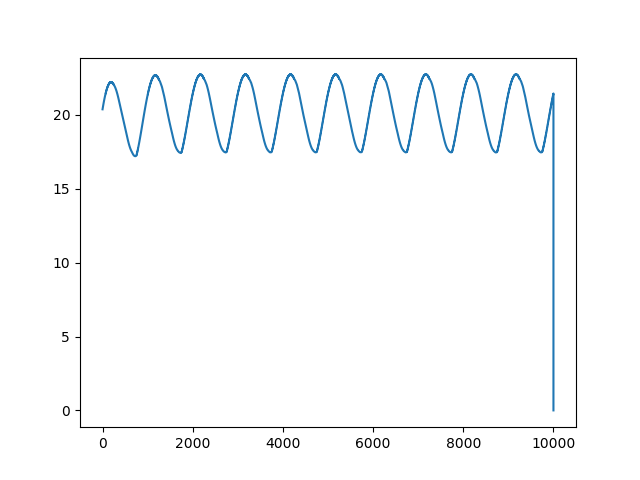

In [8]:
plt.figure()
plt.plot(t, IaFR)